In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn as skl
from scipy.stats import chi2_contingency




In [2]:
df_reduc= pd.read_csv('df_friesgo_reduc.csv')

In [3]:
df_reduc.head(5)

,Unnamed: 0,id,cod_provincia,region,tamanio_aglomerado,localidades_150,submuestra,salud_actual,nivel_de_movilidad,capacidad_cuidado_personal,...,control_hipertension,prevalencia_hipertension,medido_colesterol,fecha_med_colesterol,colesterol_alto,tratamiento_medico_col,trat_habitos_col,trat_farmac_col,autocontrol_col,prevalencia_colesterol
0,0,1128639,2,1,1,1,1,3,1,1,...,1,2.0,1,2.0,2,NaN,NaN,NaN,NaN,2.0
1,1,1709939,2,1,1,1,0,1,1,1,...,1,2.0,1,2.0,1,2.0,NaN,NaN,1.0,1.0
2,2,6874130,2,1,1,1,0,2,1,1,...,1,2.0,1,2.0,2,NaN,NaN,NaN,NaN,2.0
3,3,10319375,2,1,1,1,1,3,1,1,...,1,2.0,1,2.0,1,1.0,2.0,1.0,1.0,1.0
4,4,11140857,2,1,1,1,0,3,1,1,...,1,2.0,1,1.0,2,NaN,NaN,NaN,NaN,2.0


In [4]:
df_reduc.to_csv('reduc_conNomb.csv', sep = ',', encoding = 'utf-8', index=False)
df_reduc.to_csv('reduc_ordenado.csv', sep = ',', encoding = 'utf-8', index=False)

df_reduc_conNomb = pd.read_csv('reduc_conNomb.csv')
df_reduc_ordenado  = pd.read_csv('reduc_ordenado.csv')

In [5]:
situacion_conyugal_dict = {   
    1: 'Unido/a',
    2: 'Casado/a',
    3: 'Separado/a',
    4: 'Divorciado/a',
    5: 'Viudo/a',
    6: 'Soltero/a'
}

df_reduc_conNomb['situacion_conyugal'] = df_reduc_conNomb['situacion_conyugal'].map(situacion_conyugal_dict)
df_reduc_ordenado['situacion_conyugal'] = df_reduc_ordenado['situacion_conyugal'].map(situacion_conyugal_dict)



situacion_conyugal_2 = {
    
    'Soltero/a': 1,  # soltero pasa a ser el 1
    'Unido/a': 2,  # unido pasa a ser el 2
    'Casado/a': 3,  # casado pasa a ser el 3
    'Separado/a': 4,  # separado pasa a ser el 4
    'Divorciado/a': 5,  # divorciado pasa a ser el 5
    'Viudo/a': 6  # viudo pasa a ser el 6  
} 
        
df_reduc_ordenado['situacion_conyugal'] = df_reduc_ordenado['situacion_conyugal'].map(situacion_conyugal_2)        
        



veces_presion_alta_dict = {    
    1: 'solo 1 vez',
    2: 'mas de 1 vez',
    3: 'ninguna',
    99: 'NsNc'
}

df_reduc_conNomb['veces_presion_alta'] = df_reduc_conNomb['veces_presion_alta'].map(veces_presion_alta_dict)
df_reduc_ordenado['veces_presion_alta'] = df_reduc_ordenado['veces_presion_alta'].map(veces_presion_alta_dict)





veces_presion_alta_2 = {  
    'ninguna': 1,
    'solo 1 vez': 2,
    'mas de 1 vez': 3,
    'NsNc': 4
}

df_reduc_ordenado['veces_presion_alta'] = df_reduc_ordenado['veces_presion_alta'].map(veces_presion_alta_2)

print(df_reduc_ordenado['veces_presion_alta'])


#print(df_reduc_conNomb['veces_presion_alta'].value_counts())
#print(df_reduc_conNomb['situacion_conyugal'].value_counts())
#print(df_reduc_conNomb['edad'].describe())

0        1
1        1
2        1
3        1
4        1
        ..
29219    1
29220    3
29221    3
29222    1
29223    3
Name: veces_presion_alta, Length: 29224, dtype: int64


In [6]:

df_reduc_ordenado['veces_presion_alta']

0        1
1        1
2        1
3        1
4        1
        ..
29219    1
29220    3
29221    3
29222    1
29223    3
Name: veces_presion_alta, Length: 29224, dtype: int64

# ANALISIS ESTADISTICO DE LAS VARIABLES

## ANALISIS ENTRE EDAD Y SITUACION CONYUGAL


In [7]:
# Tabla de contingencia

contingencia = pd.crosstab(df_reduc_ordenado['veces_presion_alta'], df_reduc_ordenado['edad'])
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Chi-cuadrado: {chi2:.8f}, p-valor: {p:.8f}")

Chi-cuadrado: 4592.79824387, p-valor: 0.00000000


In [8]:
#print(contingencia)  # tabbla de contingencia
#print(pd.DataFrame(expected, index=contingencia.index, columns=contingencia.columns)) #tabla de contingencia esperada si fueran independientes


# Tabla de contingencia

contingencia = pd.crosstab(df_reduc_ordenado['veces_presion_alta'], df_reduc_ordenado['situacion_conyugal'])
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Chi-cuadrado: {chi2:.8f}, p-valor: {p:.8f}")

Chi-cuadrado: 1854.88691724, p-valor: 0.00000000


In [9]:
# Tabla de contingencia

contingencia = pd.crosstab(df_reduc_ordenado['situacion_conyugal'], df_reduc_ordenado['edad'])
chi2, p, dof, expected = chi2_contingency(contingencia)

print(f"Chi-cuadrado: {chi2:.8f}, p-valor: {p:.8f}")

Chi-cuadrado: 18522.21840998, p-valor: 0.00000000


**Se oberva que si el valor de xi2 es muy alto (es decir hay mucha discrepancia entre la frecuencia medida y la frecuencia esperada si fueran independientes)  y el valor de p <0.05 (menor que el nivel de significancia) se rechaza la hipótesis que aseguraba que no hay relación entre las variables 'veces presion alta' y 'situacion conyugal' Por lo tanto SI HAY RELACION ENTRE AMBAS.
Los valores también indican que hay relación entre veces_presion_alta y edad 'edad' y esta relación es más significativa ya que tiene un valor xi2 mas alto que el anterior.
Finalmente las variables 'situación conyugal' y 'edad' están fuertemente relacionadas.**

## ANOVA

In [10]:
#modelo_anova = smf.ols('veces_presion_alta ~ edad', data = df_reduc_ordenado).fit()
#print(modelo_anova.summary())

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Modelo ANOVA
modelo_anova4 = ols('veces_presion_alta ~ (situacion_conyugal + edad)', data=df_reduc_ordenado).fit()

# Resultados del ANOVA
resultados_anova = sm.stats.anova_lm(modelo_anova4, typ=2)
print(resultados_anova)

                          sum_sq       df            F    PR(>F)
situacion_conyugal      2.799291      1.0     4.301933  0.038078
edad                 1649.948532      1.0  2535.631326  0.000000
Residual            19014.257140  29221.0          NaN       NaN


**Dado que el valor p para la variable edad es mucho menor que el de situación conyugal, podemos afirmar que la variable EDAD es mas deterinante a la hora de establecer la probabilidad de veces presion alta**



# REGRESION LINEAL MACHINE LEARNING #

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df_reduc_ordenado['edad'], df_reduc_ordenado['veces_presion_alta'], test_size=0.2, random_state=42)

X_train_reshaped = X_train.values.reshape(-1, 1)
X_test_reshaped = X_test.values.reshape(-1, 1)

In [13]:
modelo = LinearRegression()   #inicializo modelo regresion

In [14]:
# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train_reshaped, y_train)

LinearRegression()

In [15]:
# Predecir los valores de la variable dependiente en el conjunto de prueba
y_pred = modelo.predict(X_test_reshaped)

In [16]:
# Calcular métricas de rendimiento
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [17]:

print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)
print("Error cuadrático medio (MSE):", mse)
print("Coeficiente de determinación (R^2):", r2)

Coeficientes: [0.01709705]
Intercepto: 0.817439254835253
Error cuadrático medio (MSE): 0.6591129171603906
Coeficiente de determinación (R^2): 0.11213262997911377


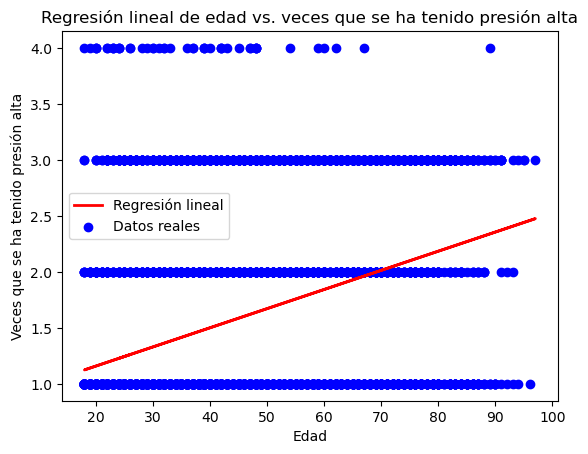

In [18]:
plt.scatter(X_test_reshaped, y_test, color='blue', label='Datos reales')

plt.plot(X_test_reshaped, y_pred, color='red', linewidth=2, label='Regresión lineal')

plt.xlabel('Edad')
plt.ylabel('Veces que se ha tenido presión alta')
plt.title('Regresión lineal de edad vs. veces que se ha tenido presión alta')
plt.legend()
plt.show()

<Figure size 1000x600 with 0 Axes>

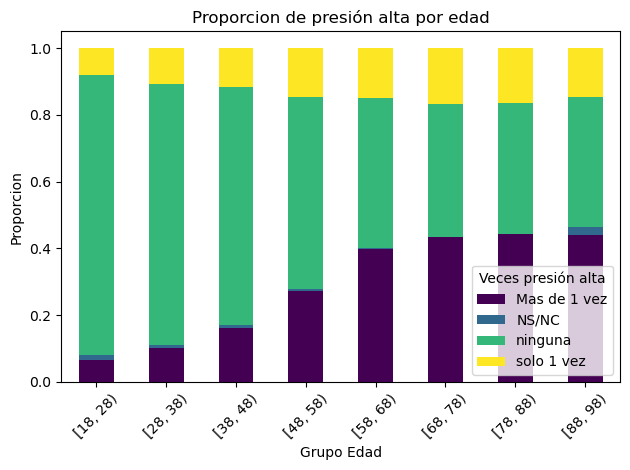

In [19]:
df_visualizacion = pd.DataFrame({'Edad': X_test_reshaped.squeeze(), 'Veces_presion_Alta': y_test})

df_visualizacion['Grupo_Edad'] = pd.cut(df_visualizacion['Edad'], bins=range(18, 101, 10), right=False) 


# Mapear los números a las categorías correspondientes
mapeo_categorias = {1: 'ninguna', 2: 'solo 1 vez', 3: 'Mas de 1 vez', 4: 'NS/NC'}
df_visualizacion['Veces_presion_Alta'] = df_visualizacion['Veces_presion_Alta'].map(mapeo_categorias)

  
# Calcular la frecuencia relativa de cada categoría de presión alta para cada grupo de edad
tabla_frecuencias = df_visualizacion.groupby(['Grupo_Edad', 'Veces_presion_Alta']).size().unstack(fill_value=0)
tabla_frecuencias = tabla_frecuencias.div(tabla_frecuencias.sum(axis=1), axis=0)


# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
tabla_frecuencias.plot(kind='bar', stacked=True, cmap='viridis')

#sns.countplot(x='Grupo_Edad', hue='Veces_presion_Alta', data=df_visualizacion, palette='viridis')

# Etiquetas y título
plt.xlabel('Grupo Edad')
plt.ylabel('Proporcion')
plt.title('Proporcion de presión alta por edad')

# Rotar las etiquetas del eje x para una mejor visualización
plt.xticks(rotation=45)

# Mostrar gráfico
plt.legend(title='Veces presión alta')
plt.tight_layout()
plt.show()